In [2]:
#libraries
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt #no
from tqdm import tqdm
from scipy.special import expit


In [47]:
#calculate probability
def logOR(a, b, input_x):
    logOR = np.exp(a+b*input_x)
    probability = logOR/(logOR + 1)
    return probability

#define the outcome
def study(P): 
    x = random.rand(1)
    if x < P:
        outcome = 1
    else:
        outcome = 0
    return outcome

#simulate data
def project(a, b, n_samples):
    np.random.seed(0)

    output = []
    input_a = []
    
    for i in range(1, n_samples + 1):
        if i <= n_samples/2:
            input_x = 0
        else:
            input_x = 1
        proba = logOR(a, b, input_x)
        output_y = study(proba) 

        output.append(output_y)
        input_a.append(input_x)
   
    dataset = pd.DataFrame({'input': input_a, 'output': output})
    dataset.to_csv('dataset.csv', index=False)
    
    return dataset

project(0.6, 1.2, 1000)

,input,output
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
995,1,1
996,1,1
997,1,0
998,1,1


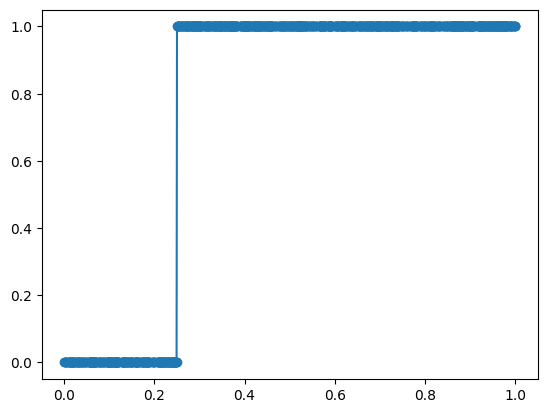

,input,output
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
995,1,1
996,1,1
997,1,0
998,1,1


In [46]:
#model with plot
#calculate probability
def logOR(a, b, input_x):
    logOR = np.exp(a+b*input_x)
    probability = logOR/(logOR + 1)
    return probability

#define the outcome
def study(P): 
    x = random.rand(1)
    if x < P:
        outcome = 1
    else:
        outcome = 0
    return outcome, x

#simulate data
def project(a, b, n_samples):
    np.random.seed(0)

    output = []
    input_a = []
    values = []
    
    for i in range(1, n_samples + 1):
        if i <= n_samples/2:
            input_x = 0
        else:
            input_x = 1
        proba = logOR(a, b, input_x)
        output_y = study(proba) 

        output.append(output_y[0])
        input_a.append(input_x)
        values.append(output_y[1])


    plt.scatter(sorted(values), sorted(output))
    plt.plot(sorted(values), sorted(output))
    plt.show()   
    
    
    dataset = pd.DataFrame({'input': input_a, 'output': output})
    dataset.to_csv('dataset.csv', index=False)

    
    return dataset

project(0.6, 1.2, 1000)